In [44]:
from scipy.stats import norm
from math import *
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 10})

plt.rcParams['figure.figsize'] = 20, 10
#plt.rcParams['axes.facecolor'] = (0.85, 0.85,0.85)

Black Scholes Option Pricing Model


In [45]:
def BlackScholes(CallPutFlag,S,K,T,r,d,v):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    if CallPutFlag=='c':
        return S*np.exp(-d*T)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    else:
        return K*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(-d*T)*norm.cdf(-d1)
      
        

Define Call Spread premium

In [3]:
def callSpread(low, high, current, time):
    
    p1 = BlackScholes('c', current, low, time, 0.03, 0.03, 0.5)
    p2 = BlackScholes('c', current, high, time, 0.03, 0.03, 0.5)
    
    price = p2 - p1
    
    return price

For a set of possible outcome prices, calculate the change in spread premium over the given time duration and then gain


In [4]:
def getReturn(low, high, current, time, prices):
    
    priceEntry = callSpread(low, high, current, time)
    gainAll = []
    
    for price in prices:
        priceOut = callSpread(low, high, price, 0.001)
        
        gain = priceOut/priceEntry
        gainAll.append(gain)
        
    return gainAll



This is where I create the probability distribution of possible price outcomes

Text(0.5, 1.0, 'Distribution of Likely 2 yr Target Prices')

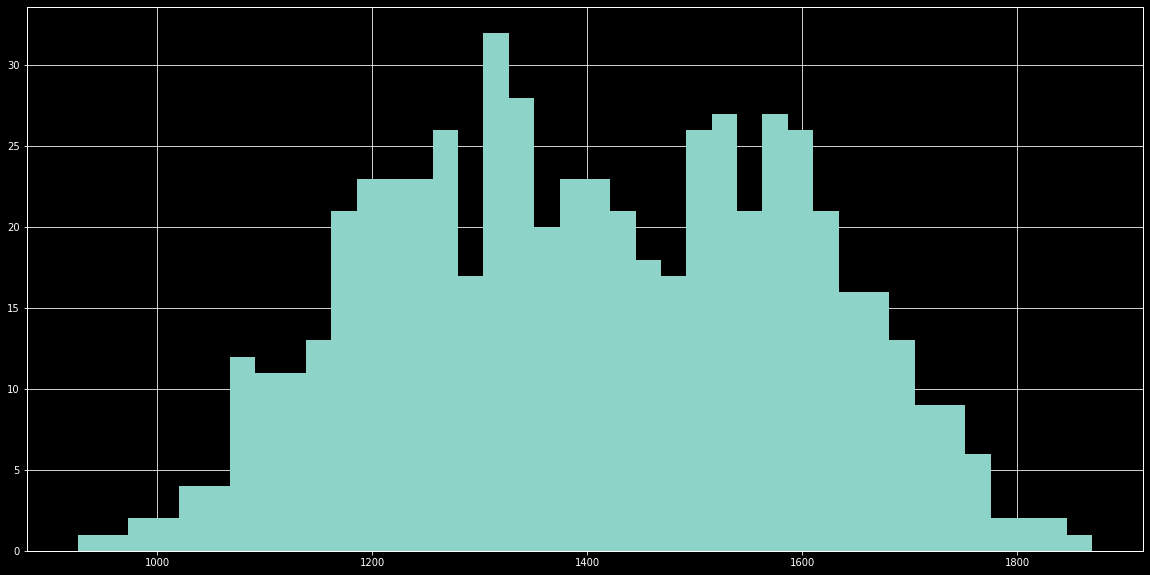

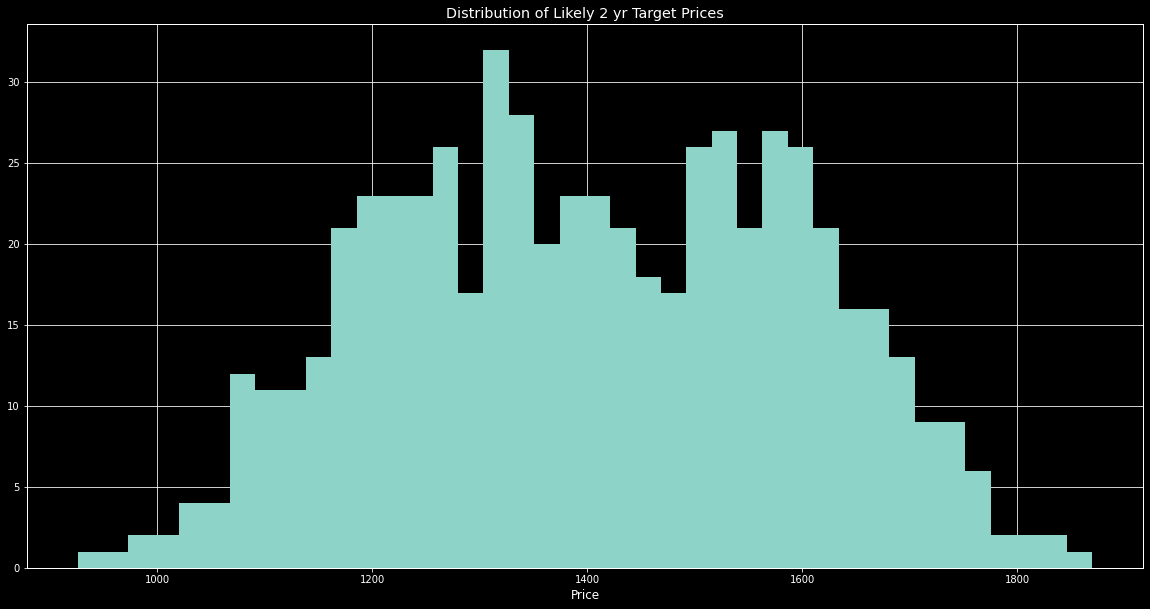

In [52]:
prices = np.random.normal(1200, 100,200)
prices = np.hstack((prices, np.random.normal(1400, 100,200)))
prices = np.hstack((prices, np.random.normal(1600, 100,200)))
prices[prices<750] = 750
plt.figure()
plt.hist(prices, bins = 40)

#prices = np.random.normal(1400, 30,600)
# prices = np.hstack((prices, np.random.normal(1200, 100,200)))
# prices = np.hstack((prices, np.random.normal(1500, 100,200)))
prices[prices<700] = 700
plt.figure()
plt.hist(prices, bins = 40)
plt.xlabel('Price')
plt.title('Distribution of Likely 2 yr Target Prices')

In [ ]:
### Loop through all possible spread combinations, calculate the mean and standard deviation of returns at each combination
lowAll = []
highAll = []
gainAll = []
sdAll = []
for low in range(1, 1401,50):
    
    for high in range(low+100, 2100, 50):
        lowAll.append(low)
        highAll.append(high)
        gain = getReturn(low, high, 1090, 2.0, prices) # timespan = 2 years = 2.0
        
        gainAll.append(np.array(gain).mean())
        sdAll.append(np.array(gain).std())
        
        

gainAll = np.array(gainAll)
lowAll = np.array(lowAll)
highAll = np.array(highAll)

In [ ]:
### Plot results

view1 = [0,0,0,0]
view2 = [0, 30, 60, 90]
for n in range(1,5):

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d');
    ax.scatter(highAll-lowAll, (lowAll+highAll)/2, gainAll, marker='^')
    ax.scatter(highAll-lowAll, (lowAll+highAll)/2, gainAll - sdAll, marker='^')
    plt.xlabel('call spread width')
    plt.ylabel('spread midpoint')

    plt.legend(('mean return','mean return - 1 stddev'))

    ax.view_init(view1[n-1], view2[n-1])
    
    #ax.view_init(-0,0)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d');
# ax.scatter(lowAll, (highAll+highAll)/2, gainAll, marker='^')
# ax.scatter(lowAll, (highAll+highAll)/2, gainAll - sdAll, marker='^')
# plt.xlabel('longLeg')
# plt.ylabel('shortLeg')
